In [5]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=fefbe923986d2d708d66b10524603177931eeff59a3ffd19575eca1e2a019ba9
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [6]:
!pip install py4j

In [7]:
import pandas as pd

In [8]:
df_pd = pd.read_csv("/content/sample_data/california_housing_train.csv")
df_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [9]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


### Начало сессии

In [10]:
from pyspark.sql import SparkSession

In [11]:
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

In [12]:
spark

### Чтение данных из файла

In [13]:
# Чтение CSV файла
csv_file = '/content/sample_data/california_housing_train.csv'
df_csv = spark.read.csv(csv_file, sep=',',
    header=True)
df_csv

DataFrame[longitude: string, latitude: string, housing_median_age: string, total_rooms: string, total_bedrooms: string, population: string, households: string, median_income: string, median_house_value: string]

In [14]:
df_csv.head(3)

[Row(longitude='-114.310000', latitude='34.190000', housing_median_age='15.000000', total_rooms='5612.000000', total_bedrooms='1283.000000', population='1015.000000', households='472.000000', median_income='1.493600', median_house_value='66900.000000'),
 Row(longitude='-114.470000', latitude='34.400000', housing_median_age='19.000000', total_rooms='7650.000000', total_bedrooms='1901.000000', population='1129.000000', households='463.000000', median_income='1.820000', median_house_value='80100.000000'),
 Row(longitude='-114.560000', latitude='33.690000', housing_median_age='17.000000', total_rooms='720.000000', total_bedrooms='174.000000', population='333.000000', households='117.000000', median_income='1.650900', median_house_value='85700.000000')]

In [110]:
df_csv.show(5)

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|-114.310000|34.190000|         15.000000|5612.000000|   1283.000000|1015.000000|472.000000|     1.493600|      66900.000000|
|-114.470000|34.400000|         19.000000|7650.000000|   1901.000000|1129.000000|463.000000|     1.820000|      80100.000000|
|-114.560000|33.690000|         17.000000| 720.000000|    174.000000| 333.000000|117.000000|     1.650900|      85700.000000|
|-114.570000|33.640000|         14.000000|1501.000000|    337.000000| 515.000000|226.000000|     3.191700|      73400.000000|
|-114.570000|33.570000|         20.000000|1454.000000|    326.000000| 624.000000|262.000000|     1.925000|      65500.

In [16]:
df_csv.printSchema()

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- housing_median_age: string (nullable = true)
 |-- total_rooms: string (nullable = true)
 |-- total_bedrooms: string (nullable = true)
 |-- population: string (nullable = true)
 |-- households: string (nullable = true)
 |-- median_income: string (nullable = true)
 |-- median_house_value: string (nullable = true)



### Изменение типа данных

In [23]:
from pyspark.sql.types import *

In [24]:
# https://spark.apache.org/docs/latest/sql-ref-datatypes.html

data_schema = [
               StructField('longitude', DoubleType(), True),
               StructField('latitude', DoubleType(), True),
               StructField('housing_median_age', DoubleType(), True),
               StructField('total_rooms', DoubleType(), True),
               StructField('total_bedrooms', DoubleType(), True),
               StructField('population', DoubleType(), True),
               StructField('households', DoubleType(), True),
               StructField('median_income', DoubleType(), True),
               StructField('median_house_value', DoubleType(), True),
            ]

final_structure = StructType(fields = data_schema)

In [25]:
data = spark.read.csv(
    csv_file,
    sep=',',
    header=True,
    schema=final_structure
)

In [28]:
data.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
+---------+--------+----

### Схема и тип данных

In [26]:
data.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



In [27]:
data.dtypes

[('longitude', 'double'),
 ('latitude', 'double'),
 ('housing_median_age', 'double'),
 ('total_rooms', 'double'),
 ('total_bedrooms', 'double'),
 ('population', 'double'),
 ('households', 'double'),
 ('median_income', 'double'),
 ('median_house_value', 'double')]

### Выборки и проверка данных

In [107]:
data.first()

Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0)

In [108]:
data.take(4)

[Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0),
 Row(longitude=-114.47, latitude=34.4, housing_median_age=19.0, total_rooms=7650.0, total_bedrooms=1901.0, population=1129.0, households=463.0, median_income=1.82, median_house_value=80100.0),
 Row(longitude=-114.56, latitude=33.69, housing_median_age=17.0, total_rooms=720.0, total_bedrooms=174.0, population=333.0, households=117.0, median_income=1.6509, median_house_value=85700.0),
 Row(longitude=-114.57, latitude=33.64, housing_median_age=14.0, total_rooms=1501.0, total_bedrooms=337.0, population=515.0, households=226.0, median_income=3.1917, median_house_value=73400.0)]

In [109]:
data.describe().show()

+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|      total_rooms|   total_bedrooms|        population|       households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|              17000|             17000|             17000|            17000|            17000|             17000|            17000|             17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827| 28.58935294117647|2643.664411764706|539.4108235294118|1429.5739411764705|501.2219411764706| 3.883578100000021|207300.91235294117|
| stddev| 2.0051664084260357|2.1373397946570867|12.586936981660406|2179.947071452777|421.4994515798648| 1

In [32]:
data.columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [33]:
data.count()

17000

In [112]:
# Позволяет удалить строки с дублями значений (полный дубль строки)
# https://sparkbyexamples.com/pyspark/pyspark-distinct-to-drop-duplicates/
data.distinct().show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -117.06|   32.79|              17.0|     2524.0|         332.0|     771.0|     317.0|       8.7604|          331800.0|
|  -117.09|   32.76|              43.0|     3889.0|         711.0|    1466.0|     663.0|       3.5529|          223000.0|
|  -117.13|   32.75|              23.0|     3999.0|        1182.0|    2051.0|    1130.0|       2.1292|          135000.0|
|  -117.14|    32.7|              36.0|      633.0|         148.0|     557.0|     139.0|       1.5729|           82700.0|
+---------+--------+----

### Операции со столбцами

In [37]:
data = data.withColumn('total_rooms_1', data.total_rooms)

data.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+-------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|total_rooms_1|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+-------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|       5612.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|       7650.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|        720.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|       1501.0|
|  -114.57|   33.57|              20.0|     1454

In [38]:
data = data.withColumnRenamed('total_rooms_1', 'rooms_and_bedrooms')

data.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|rooms_and_bedrooms|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|            5612.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|            7650.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|             720.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|            1501.0|
|  -114.57|  

In [39]:
data = data.drop('rooms_and_bedrooms')

data.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
+---------+--------+----

### Работа с недостающими значениями

In [44]:
from pyspark.sql.functions import *

In [47]:
# Кол-во nan строк
data.select([count(when(isnan(c), c)).alias(c) for c in data.columns]).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|        0|       0|                 0|          0|             0|         0|         0|            0|                 0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [49]:
# Кол-во null строк
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|        0|       0|                 0|          0|             0|         0|         0|            0|                 0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [40]:
# Чтение JSON файла
json_file = '/content/sample_data/anscombe.json'
df_json = spark.read.json(
                          json_file,

                          )
df_json

DataFrame[Series: string, X: double, Y: double, _corrupt_record: string]

In [41]:
df_json.show(5)

+------+----+----+---------------+
|Series|   X|   Y|_corrupt_record|
+------+----+----+---------------+
|  null|null|null|              [|
|     I|10.0|8.04|           null|
|     I| 8.0|6.95|           null|
|     I|13.0|7.58|           null|
|     I| 9.0|8.81|           null|
+------+----+----+---------------+
only showing top 5 rows



In [80]:
df_json = df_json.drop('_corrupt_record')
df_json.show(5)

+------+----+----+
|Series|   X|   Y|
+------+----+----+
|  null|null|null|
|     I|10.0|8.04|
|     I| 8.0|6.95|
|     I|13.0|7.58|
|     I| 9.0|8.81|
+------+----+----+
only showing top 5 rows



In [81]:
df_json.select([count(when(isnan(c), c)).alias(c) for c in df_json.columns]).show()

+------+---+---+
|Series|  X|  Y|
+------+---+---+
|     0|  0|  0|
+------+---+---+



In [82]:
df_json.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_json.columns]).show()

+------+---+---+
|Series|  X|  Y|
+------+---+---+
|     2|  2|  2|
+------+---+---+



In [113]:
# Удаление строк с пропущенными значениями
# any — удалит строки если хоть один столбец содержит пропущенные значения
# all — удалить строки, если все столбцы содержат пропущенные значения
# https://sparkbyexamples.com/pyspark/pyspark-drop-rows-with-null-values/
df_json_drop_na = df_json.na.drop("all")

In [84]:
df_json_drop_na.show(5)

+------+----+----+
|Series|   X|   Y|
+------+----+----+
|     I|10.0|8.04|
|     I| 8.0|6.95|
|     I|13.0|7.58|
|     I| 9.0|8.81|
|     I|11.0|8.33|
+------+----+----+
only showing top 5 rows



In [85]:
df_json_drop_na.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_json_drop_na.columns]).show()

+------+---+---+
|Series|  X|  Y|
+------+---+---+
|     0|  0|  0|
+------+---+---+



In [92]:
# Замена отсутствующих значений константой
df_json.na.fill(0).show(5)

+------+----+----+
|Series|   X|   Y|
+------+----+----+
|  null| 0.0| 0.0|
|     I|10.0|8.04|
|     I| 8.0|6.95|
|     I|13.0|7.58|
|     I| 9.0|8.81|
+------+----+----+
only showing top 5 rows



In [93]:
df_json.na.fill({"Series": "I"}).show(5)

+------+----+----+
|Series|   X|   Y|
+------+----+----+
|     I|null|null|
|     I|10.0|8.04|
|     I| 8.0|6.95|
|     I|13.0|7.58|
|     I| 9.0|8.81|
+------+----+----+
only showing top 5 rows



In [97]:
df_json.select(mean(df_json['X'])).show(5)

+------+
|avg(X)|
+------+
|   9.0|
+------+



In [96]:
df_json.select(mean(df_json['X'])).collect()[0][0]

9.0

In [100]:
# Замена отсутствующих значений средним
df_json.na.fill({"X": df_json.select(mean(df_json["X"])).collect()[0][0], "Y": df_json.select(mean(df_json["Y"])).collect()[0][0]}).show(5)

+------+----+-----------------+
|Series|   X|                Y|
+------+----+-----------------+
|  null| 9.0|7.500454545454546|
|     I|10.0|             8.04|
|     I| 8.0|             6.95|
|     I|13.0|             7.58|
|     I| 9.0|             8.81|
+------+----+-----------------+
only showing top 5 rows



In [102]:
# Замена отсутствующих значений новыми
df_json.na.replace(10, 3).show(5)

+------+----+----+
|Series|   X|   Y|
+------+----+----+
|  null|null|null|
|     I| 3.0|8.04|
|     I| 8.0|6.95|
|     I|13.0|7.58|
|     I| 9.0|8.81|
+------+----+----+
only showing top 5 rows



### Получение данных

In [116]:
# Выбор одного столбца
data.select('population').show(5)

+----------+
|population|
+----------+
|    1015.0|
|    1129.0|
|     333.0|
|     515.0|
|     624.0|
+----------+
only showing top 5 rows



In [117]:
# Выбор нескольких столбцов
data.select(['housing_median_age', 'population', 'median_income', 'median_house_value']).show(5)

+------------------+----------+-------------+------------------+
|housing_median_age|population|median_income|median_house_value|
+------------------+----------+-------------+------------------+
|              15.0|    1015.0|       1.4936|           66900.0|
|              19.0|    1129.0|         1.82|           80100.0|
|              17.0|     333.0|       1.6509|           85700.0|
|              14.0|     515.0|       3.1917|           73400.0|
|              20.0|     624.0|        1.925|           65500.0|
+------------------+----------+-------------+------------------+
only showing top 5 rows



In [121]:
data.filter((col('housing_median_age') >= 35) & (col('median_income') <= 2.0)).show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.59|   34.83|              41.0|      812.0|         168.0|     375.0|     158.0|       1.7083|           48500.0|
|  -115.38|   32.82|              38.0|     1892.0|         394.0|    1175.0|     374.0|       1.9939|           65800.0|
|  -115.38|   32.81|              35.0|     1263.0|         262.0|     950.0|     241.0|       1.8958|           67500.0|
|  -115.52|   33.12|              38.0|     1327.0|         262.0|     784.0|     231.0|       1.8793|           60800.0|
|  -116.88|   34.19|              38.0|      898.0|         259.0|     106.0|      52.0|       1.6875|          225000.0|
+---------+--------+----

In [123]:
data.filter(data.housing_median_age.between(35.0, 40.0)).count()

2713

In [130]:
# Выберет из таблицы data столбцы 'longitude', 'latitude'
# и добавить еще один столбец, который будет принимать значения "да" или "нет"
# в зависимости от выполнения условия

data.select('longitude', 'latitude',
            when(data.median_house_value <= 225000.0, "да")
            .otherwise("нет")).show(5)

+---------+--------+---------------------------------------------------------------+
|longitude|latitude|CASE WHEN (median_house_value <= 225000.0) THEN да ELSE нет END|
+---------+--------+---------------------------------------------------------------+
|  -114.31|   34.19|                                                             да|
|  -114.47|    34.4|                                                             да|
|  -114.56|   33.69|                                                             да|
|  -114.57|   33.64|                                                             да|
|  -114.57|   33.57|                                                             да|
+---------+--------+---------------------------------------------------------------+
only showing top 5 rows



In [131]:
# Добавили alias с названием колонки
data.select('longitude', 'latitude',
            when(data.median_house_value <= 225000.0, "да")
            .otherwise("нет").alias("high_house_value")).show(5)

+---------+--------+----------------+
|longitude|latitude|high_house_value|
+---------+--------+----------------+
|  -114.31|   34.19|              да|
|  -114.47|    34.4|              да|
|  -114.56|   33.69|              да|
|  -114.57|   33.64|              да|
|  -114.57|   33.57|              да|
+---------+--------+----------------+
only showing top 5 rows



In [136]:
# проверка на вхождение
df_json.select(
    'Series',
    df_json.Series.rlike('^IV').alias('series_start_IV')
).distinct().show()

+------+------------+
|Series|series_start|
+------+------------+
|     I|       false|
|    II|       false|
|  null|        null|
|    IV|        true|
|   III|       false|
+------+------------+



In [137]:
data.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    

In [143]:
data.select(['housing_median_age', 'median_income', 'median_house_value'])\
.groupBy('housing_median_age').mean().show(6)

+------------------+-----------------------+------------------+-----------------------+
|housing_median_age|avg(housing_median_age)|avg(median_income)|avg(median_house_value)|
+------------------+-----------------------+------------------+-----------------------+
|               8.0|                    8.0| 4.412988202247189|     190805.07303370786|
|               7.0|                    7.0| 4.368441059602648|       188445.059602649|
|              49.0|                   49.0|3.5476567567567545|      220667.6126126126|
|              29.0|                   29.0|3.6335564171123003|     195185.86363636365|
|              47.0|                   47.0| 3.278638285714285|     190064.61142857143|
|              42.0|                   42.0|3.4470883116883098|      199635.1103896104|
+------------------+-----------------------+------------------+-----------------------+
only showing top 6 rows



In [145]:
data.filter((col('housing_median_age') >= 18.0 ) & (col('housing_median_age') <= 35))\
    .groupBy("housing_median_age") \
    .agg(
         min("households").alias("min_households"),
         max("households").alias("max_households"),
         avg("households").alias("mean_households"),

         min("median_income").alias("min_income"),
         max("median_income").alias("max_income"),
         avg("median_income").alias("mean_income"),

         min("median_house_value").alias("min_house_value"),
         max("median_house_value").alias("max_house_value"),
         avg("median_house_value").alias("mean_house_value"),

      ).show(truncate=False)

+------------------+--------------+--------------+------------------+----------+----------+------------------+---------------+---------------+------------------+
|housing_median_age|min_households|max_households|mean_households   |min_income|max_income|mean_income       |min_house_value|max_house_value|mean_house_value  |
+------------------+--------------+--------------+------------------+----------+----------+------------------+---------------+---------------+------------------+
|29.0              |18.0          |2826.0        |493.1577540106952 |0.7069    |13.947    |3.6335564171123003|28300.0        |500001.0       |195185.86363636365|
|35.0              |29.0          |2769.0        |387.9421965317919 |0.7075    |15.0001   |3.9093914739884394|39600.0        |500001.0       |205624.46242774566|
|18.0              |21.0          |2552.0        |573.2489539748954 |0.8246    |11.6017   |3.954590794979081 |47500.0        |500001.0       |192074.71548117156|
|34.0              |13.0    

### Визуализация данных

In [146]:
from matplotlib import pyplot as plt

In [148]:
df_json.show(5)

+------+----+----+
|Series|   X|   Y|
+------+----+----+
|  null|null|null|
|     I|10.0|8.04|
|     I| 8.0|6.95|
|     I|13.0|7.58|
|     I| 9.0|8.81|
+------+----+----+
only showing top 5 rows



In [150]:
sec_df =  df_json.select(['Series', 'X', 'Y']).groupBy('Series').mean()\
                     .toPandas()
sec_df.head()

,Series,avg(X),avg(Y)
0,None,NaN,NaN
1,III,9.0,7.500000
2,IV,9.0,7.500909
3,II,9.0,7.500909
4,I,9.0,7.500000


In [152]:
sec_df = sec_df.dropna()

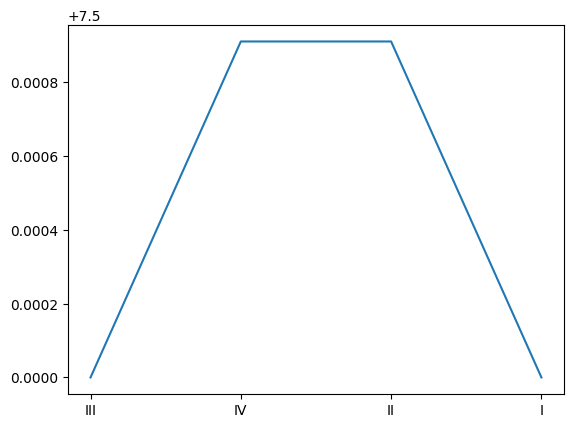

In [154]:
plt.plot(sec_df['Series'], sec_df['avg(Y)'])
plt.show()